# 1 - What is Regression?

---

Now that we've covered some of the basics of programming with Python we're going to move on to look into one of the most fundamental ideas in all of data science and data analysis - regression. 

Regression is a statistical technique used to predict or forecast a numerical value based on data we have collected about the past. This involves three fundamental steps:

1. Collect the data
2. Fit a function to that data (often called the *model*)
3. Use our fitted model to predict new values

Here are some examples of problems that we could tackle using some kind of regression

### Example 1

A car dealership wants to understand the how the total number of salespeople they contract in to sell their cars effects the total number of cars they sell. Each month they count both of these variables and make a table. 

| Month  | No. salespeople | Cars sold |
|--------|-----------------|-----------|
| March  | 30              | 607       |
| April  | 10              | 91        |
| May    | 50              | 910       |
| June   | 35              | 653       |
| July   | 20              | 190       |
| August | 45              | ?         | 

*Table 1. A company's monthly sales figures alongside the number of salespeople hired*

At the beginning of August they hire 45 salespeople. How many cars can they expect to sell?

### Example 2 

A corn farmer wants to understand the effect that different levels of nutrients in her fertilizer has on crop yields. She tests five different mixes of Nitrogen, Potassium and Phosphorus on five different fields with similar soil conditions. 

| Field | Nitrogen | Potassium | Phosphorus | Tonnes per Acre |
|-------|----------|-----------|------------|-----------------|
| A     | 15       | 50        | 35         | 3.2             |
| B     | 25       | 30        | 45         | 3.7             |
| C     | 20       | 20        | 60         | 4.2             |
| D     | 40       | 25        | 35         | 4.1             |
| E     | 35       | 40        | 25         | 2.9             |

*Table 2. The corn yield for different fields where different fertilizers have been used. *

She wants to use this information to predict the crop yield for a new fertilizer which is mixed in a ratio of 30:30:40. 

## Linear regression

--- 

As you can see, both these examples involve predicting some number (the *dependant* variable) from one of more other numbers (the *independent* variables). The simplest possible model for how these quantities might interact is a so-called *linear model*. 

In this model, we assume that the dependant variable is a linear function of the independant variable(s). In the simplest case of one dependant variable, and one independant variable (like the car sales example), this boils down saying: 

"We predict that the number of cars sold in a month can be well approximated as 

$$
\text{no. cars sold} = c + m \times \text{no. salespeople}
$$

for some constants $c$ and $m$"

Do you think this is a reasonable assumption? Let's plot the data 



In [1]:
# run the imports
import numpy as np
import matplotlib.pyplot as plt

from scripts.regression1 import *

np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True)
%matplotlib notebook

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


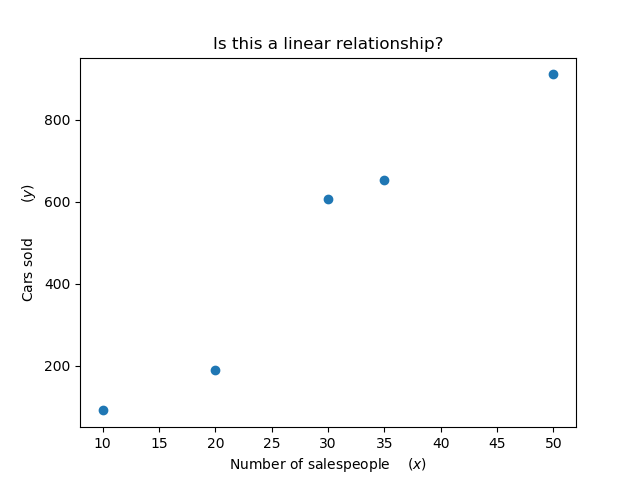

Text(0.5, 1.0, 'Is this a linear relationship?')

In [6]:
no_salespeople = np.array([30, 10, 50, 35, 20])
total_sales = np.array([607,  91, 910, 653, 190])

plt.figure()
plt.scatter(no_salespeople, total_sales)
plt.xlabel('Number of salespeople \t ($x$)')
plt.ylabel('Cars sold \t ($y$)')
plt.title('Is this a linear relationship?')

Without more data it's difficult to say whether there is a linear relationsip or whether there is a more complex one. However, in the absence of more data points we can say yes, in this case a linear model is certainly *reasonable*. 

When it comes to plotting a line there are two variables we have to worry about: the *gradient* and the *intercept* which are often referred to as $m$ and $c$ respectively. The equation of a line is defined as 

$$
y = mx + c
$$

### The gradient $m$

This determines the slope of the line. We calculate a gradient by "rise over run". A gradient of zero means the line is totally flat. A gradient of 2 means for every increase yb 1 in $x$ we have an increase in $y$ by 2, and so on. 

![](images/gradients.png)

### The intercept $c$

This determines what the $y$-value is when $x$ is zero. You can think of this as shifting the line up and down. 

![](images/intercepts.png)

## Finding the best values for $m$ and $c$

When we do simple linear regression, we want to find the values for $m$ and $c$ that best fit our collected data. Try varying these parameters on the interactive graph below to find ones that seem to fit the data well.

<IPython.core.display.Javascript object>


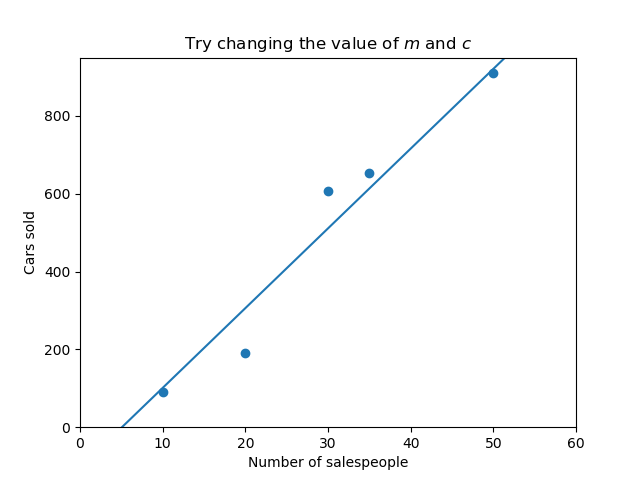

interactive(children=(IntSlider(value=0, description='c', max=400, min=-400), Output()), _dom_classes=('widget…

interactive(children=(FloatSlider(value=10.0, description='m', max=40.0), Output()), _dom_classes=('widget-int…

In [7]:
make_graph_1()

## Question: How could we begin to quantify how well our line fits this data?

Let's consider the example from above, but this time we will assume that the constant $c$ is equal to zero. Indeed, this may be a reasonable assumption. If $c=0$ we are essentially saying "when we hire no salespeople we sell no cars". In this case, our equation becomes 

$$
y = mx
$$

and we have only one parameter, $m$, to vary. 

Let's say we chose some value for $m$, say, 5. How do we know if this is a good value or not?

One way we could quantify this is by looking at the the difference between our equation value and the data values. Let's think about this in a general case. Say we collected $N$ data points, each of which have an $x$-value and a $y$-value. In the case of the car salespeople, $N=5$, $x$ represents the number of people hired, and $y$ represents the number of cars sold. We can refer to each individual data point as $(x_i, y_i)$ where the subscript $i$ runs from 1 to 5. 

$$
\text{Data} = [\,(x_1, y_1), \, (x_2, y_2),\, (x_3, y_3), \,(x_4, y_4), \,(x_5, y_5)\, ]
$$

For a given value of $x_i$, our prediction for the number of cars sold is $mx_i$ and our real observed value is $y_i$. The difference is $y_i - mx_i$. Note that this could be positive or negative depending on which is larger. Since we don't really care whether we over-predict or under-predict we can square this value, making it positive either way. We can then add this up for every data point. 

$$
\text{Total Error} = (y_1 - mx_1)^2 + (y_2 - mx_2)^2 + (y_3 - mx_3)^2 + (y_4 - mx_4)^2 + (y_5 - mx_5)^2
$$

We can summarise this by using *summation notation*

$$
\text{Total Error} = \sum_{i=1}^{N}(y_i - m x_i)^2
$$

The total error, which we will call $E$ is a *function of $m$*. That is, as we vary $m$ our total error varies too. 

$$
E(m) = \sum_{i=1}^{N}(y_i - m x_i)^2
$$

Our goal is to find the value of $m$ that minimises our total error $E(m)$. 

<IPython.core.display.Javascript object>


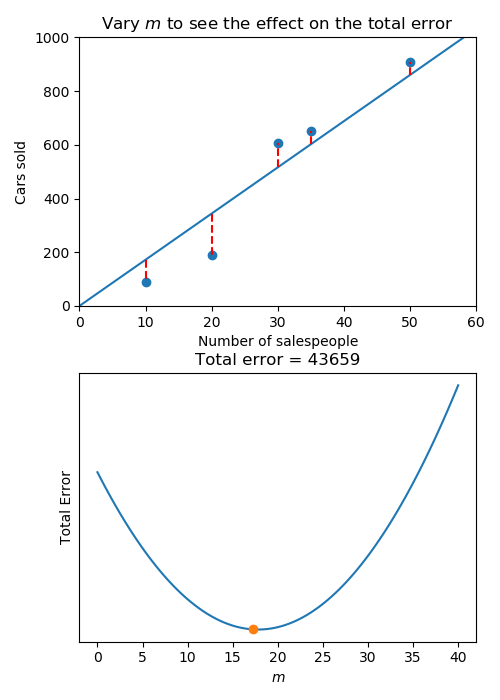

interactive(children=(FloatSlider(value=15.0, description='m', max=40.0), Output()), _dom_classes=('widget-int…

In [8]:
make_graph_2()

## A brief discussion of derivatives

Hopefully you can see from this graph that the "best" value of $m$ occurs when the total error is at a minimum - i.e. when the graph is *flat*. How do we think about this place mathematically? Earlier we mentioned the idea of *gradients*. In the case of a line the gradient or slope is constant everywhere. However, when we have a curve the slope changes from place to place. When a curved graph is flat we say the gradient is equal to zero. Take a look at the interactive plot below

<IPython.core.display.Javascript object>


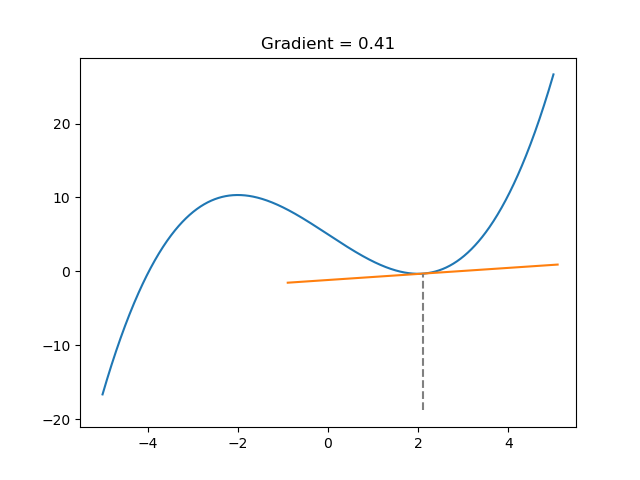

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-5.0, step=0.01), Output()), _dom_c…

In [9]:
make_graph_3()

We can calculate the gradient of a curve at any point by taking the *derivative*. In our case, we want to find the derivative of the error function with respect to $m$. If we can set that equal to zero then we have a mathematical expression which we can solve to find the best value of $m$. 

For more information about derivatives speak with one of the instructors. 

## Back to two parameters

We have seen how our total error changes as we vary the value of $m$, and that we can find the best value by identifying the point at which the gradient of the error function with respect to $m$ is zero. But what happens when we have two parameters: both $m$ and $c$? In this case our prediction for the number of cars sold is 

$$
c + m \times \text{no. salespeople}
$$

or in terms of $x$ and $y$

$$
c + mx_i
$$

In this case our total error will be 

$$
\text{Total Error} = E(m, c) = \sum_{i=1}^{N}(y_i - m x_i - c)^2
$$

Here our error function takes two numbers: $m$ and $c$. So our task is now to find the values of both of these parameters which minimises the total error. Take a look at the interactive plot below and try to make sense of what's going on

<IPython.core.display.Javascript object>


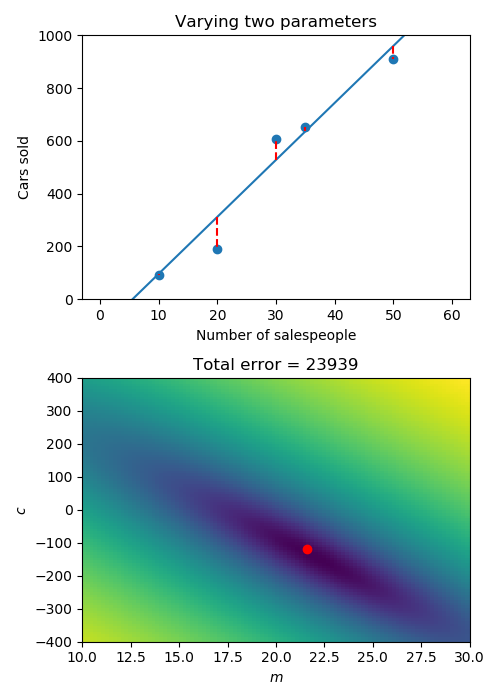

interactive(children=(IntSlider(value=0, description='c', max=400, min=-400), Output()), _dom_classes=('widget…

interactive(children=(FloatSlider(value=20.0, description='m', max=30.0, min=10.0), Output()), _dom_classes=('…

In [10]:
make_graph_4()

## More independant variables?

In any real world situation there are likely to be many factors infulencing some variable of interest. Let's take the car example. What other factors could be affecting the number of cars sold? Perhaps the weather? Perhaps economic indicators like unemployment or inflation? There are many possibilities. Let's say we hypothesise that the nationwide unenployment rate affects the number of cars sold. 

| Month  | No. salespeople | UK Unemployment rate |Cars sold |
|--------|-----------------|--|---------|
| March  | 30              | 6.8% |607       |
| April  | 10              | 7.0% |91        |
| May    | 50              | 5.5% |910       |
| June   | 35              | 5.3% |653       |
| July   | 20              | 6.0% |190       |
| August | 45              | 6.7% |?         | 

In the general case, we can label the dependant variable $y$ as before, and each of the independant variables (such as number of salespeople, inflation etc as $x^{(1)},x^{(2)}$ ... ). That would give us a table that looks something like this


|Month|  $x^{(1)}$  |  $x^{(2)}$  |  $x^{(3)}$  | ... | Cars sold |
|--|--|--|--|--|--|
|March| $x^{(1)}_1$|$x^{(2)}_1$|$x^{(3)}_1$| ... | 607 |
|April| $x^{(1)}_2$|$x^{(2)}_2$|$x^{(3)}_2$|... | 91|
|May|$x^{(1)}_3$|$x^{(2)}_3$|$x^{(3)}_3$|... | 910|
|June|$x^{(1)}_4$|$x^{(2)}_4$|$x^{(3)}_4$|... | 653|
|July|$x^{(1)}_5$|$x^{(2)}_5$|$x^{(3)}_5$|... | 190|
|August|$x^{(1)}_6$|$x^{(2)}_6$|$x^{(3)}_6$|... | ?|

The equivalent linear model for multiple independant variables would be

$$
y = c + m_1 x^{(1)} + m_2 x^{(2)} + m_3 x^{(3)} + ...
$$

Now we have an intercept $c$, and also an $m$ for each of the variables. If we have $k$ independant variables, then we have $k+1$ parameters to vary. Consider what this regression would look like for two independant variables


<IPython.core.display.Javascript object>


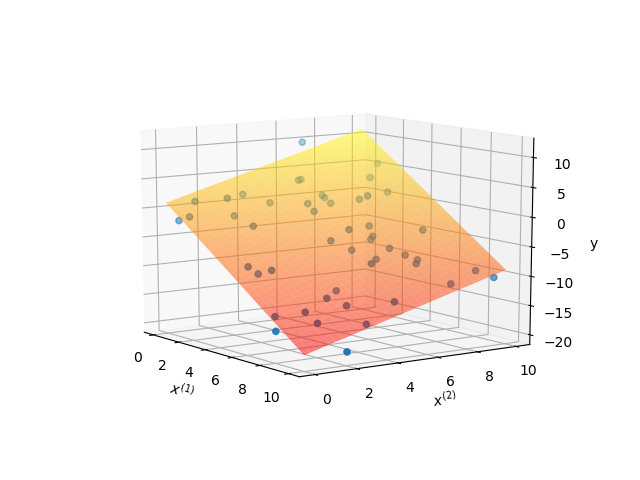

In [11]:
make_graph_5()

In this case we would be seeking the variables $c, m_1$ and $m_2$ that minimise

$$
E(c, m_1, m_2) = \sum_{i=1}^{N} (y_i - c - m_1 x^{(1)}_i - m_2 x^{(2)}_i)^2
$$

## Beyond straight lines?

We could indeed propose a model that is more complex than a simple linear one. Let's return to regression with one variable. What if instead of suggesting a line of the form

$$
y = c + mx
$$

we proposed a *curve* of the form 

$$
y = a + bx + cx^3 + dx^3
$$

In this case we have four variables to vary: $a, b, c$ and $d$. 

<IPython.core.display.Javascript object>


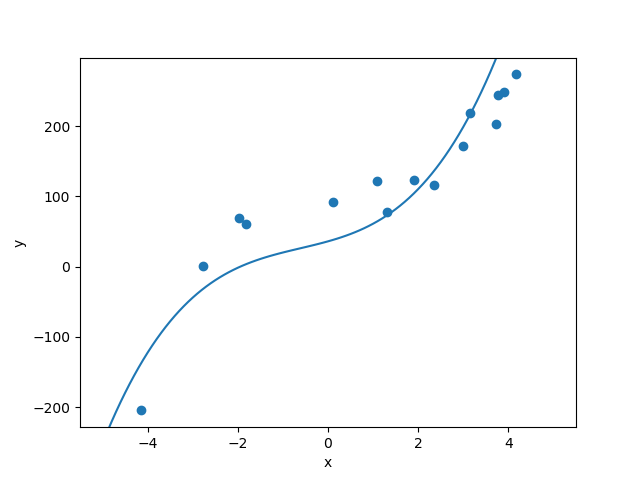

interactive(children=(IntSlider(value=0, description='a', max=200, min=-200), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=0, description='b', min=-100), Output()), _dom_classes=('widget-interact…

interactive(children=(FloatSlider(value=0.0, description='c', max=50.0, min=-50.0), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=0.0, description='d', max=4.0, min=-4.0, step=0.05), Output()), _dom_c…

In [12]:
make_graph_6()